# Review
* Convert to json
https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-dataframe

## Review: read CSV by pandas
* `df.groupby(col1)[col2].count()` summarize col2 according to col1 by counting
* `df.groupby(col1)[col2].mena()` summarize col2 according to col1 by calculating their average of each category
* `df.groupby([col1, col3])[col2].count()` summarize col2 according to col1 and col3 by counting


In [6]:
import pandas as pd
df = pd.read_csv('data/14196_drug_adv.csv', error_bad_lines=False)
# list(df["刊播媒體"])
df.刊播媒體類別

type_dict = {}
for item in list(df.刊播媒體類別):
    type_dict[item] = 0
for item in list(df.刊播媒體類別):
    type_dict[item] += 1
print(type_dict)

{'網路': 1479, '平面媒體': 111, '其他': 13, '廣播電台': 71, '電視': 86}


In [13]:
df.刊播媒體類別.count()

1760

In [16]:
df.groupby("刊播媒體類別").count()

,違規產品名稱,違規廠商名稱或負責人,處分機關,處分日期,處分法條,違規情節,刊播日期,刊播媒體,查處情形
刊播媒體類別,,,,,,,,,
其他,13,13,0,8,4,11,13,0,13
平面媒體,111,111,111,111,6,78,111,108,111
廣播電台,71,71,0,35,15,60,71,69,71
網路,1479,1479,0,1171,561,1403,1479,1357,1477
電視,86,86,0,38,38,78,86,58,86


## Review: Convert ubike(dict of dict) to a list of json
* `df.head()` print out top 5 entries of data

In [18]:
import requests
response = requests.get('http://data.taipei/youbike').json()
all_list = []
for k, v in data["retVal"].items():
    all_list.append(v)
    
ubike_df = pd.DataFrame(all_list)
ubike_df.head()

,act,ar,aren,bemp,lat,lng,mday,sarea,sareaen,sbi,sna,snaen,sno,tot
0,1,忠孝東路/松仁路(東南側),The S.W. side of Road Zhongxiao East Road & Ro...,139,25.0408578889,121.567904444,20181017223625,信義區,Xinyi Dist.,41,捷運市政府站(3號出口),MRT Taipei City Hall Stataion(Exit 3)-2,0001,180
1,1,忠孝東路四段/光復南路口(西南側),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",48,25.041254,121.55742,20181017223642,大安區,Daan Dist.,0,捷運國父紀念館站(2號出口),MRT S.Y.S Memorial Hall Stataion(Exit 2.),0002,48
2,1,台北市政府東門(松智路),Taipei City Government Eastgate (Song Zhi Road),21,25.0377972222,121.565169444,20181017223621,信義區,Xinyi Dist.,19,台北市政府,Taipei City Hall,0003,40
3,1,市府路/松壽路(西北側),The N.W. side of Road Shifu & Road Song Shou.,44,25.0360361111,121.562325,20181017223619,信義區,Xinyi Dist.,16,市民廣場,Citizen Square,0004,60
4,1,松仁路/松仁路95巷(東南側),"The S.E. side of Road Songren & Ln. 95, Songre...",35,25.0365638889,121.5686639,20181017223627,信義區,Xinyi Dist.,24,興雅國中,Xingya Jr. High School,0005,60


# Operations of pandas DataFrame
* `df.info()` and `df.describe()` 觀察各個變數的分佈 to check data type or get basic summary of data 。
* `pd.to_numeric(var)` 修改變數型態 to convert data type 
* `df = df.assign(new_var = old_var1 / old_var2)` 產生新的變數（方法一） to create or convert new variable. Be careful! You must assign to left to overwrite original df. 
* `df["new_var"] = df.old_var1 / df.old_var2` 產生新的變數（方法二）


In [47]:
ubike_df = ubike_df.assign(sbi = pd.to_numeric(ubike_df.sbi),\
               tot = pd.to_numeric(ubike_df.tot))
# ubike_df["ratio"] = ubike_df.sbi / ubike_df.tot
ubike_df = ubike_df.assign(test = ubike_df.sbi/ubike_df.tot)
ubike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
act        400 non-null object
ar         400 non-null object
aren       400 non-null object
bemp       400 non-null object
lat        400 non-null object
lng        400 non-null object
mday       400 non-null object
sarea      400 non-null object
sareaen    400 non-null object
sbi        400 non-null int64
sna        400 non-null object
snaen      400 non-null object
sno        400 non-null object
tot        400 non-null int64
ratio      400 non-null float64
test       400 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 50.1+ KB


In [46]:
ubike_df.describe()

,sbi,tot,ratio
count,400.000000,400.000000,400.000000
mean,15.355000,40.425000,0.385330
std,10.578693,13.747066,0.219208
min,0.000000,22.000000,0.000000
25%,8.000000,32.000000,0.222222
50%,14.000000,38.000000,0.384615
75%,21.000000,46.000000,0.561080
max,90.000000,180.000000,0.961538


# .groupby() to summarize data according to several variables
* Using `groupby` to summarize data by area e.g., 信義區

In [50]:
ubike_df.groupby("sarea").count()

,act,ar,aren,bemp,lat,lng,mday,sareaen,sbi,sna,snaen,sno,tot,ratio,test
sarea,,,,,,,,,,,,,,,
中山區,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
中正區,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
信義區,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
內湖區,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
北投區,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
南港區,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
士林區,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
大同區,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
大安區,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48


In [52]:
ubike_df.groupby("sarea")["tot", "sbi"].mean()

,tot,sbi
sarea,,
中山區,40.434783,17.304348
中正區,43.941176,14.117647
信義區,47.000000,15.763158
內湖區,37.761905,14.142857
北投區,43.500000,19.035714
南港區,36.636364,14.727273
士林區,39.222222,13.361111
大同區,36.727273,12.318182
大安區,41.916667,14.750000


# Practice rent591

In [59]:
import pickle
with open("data/rent591.pkl", "rb") as fin:
    list591, df591 = pickle.load(fin)

In [61]:
df591.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,,同安街80巷古亭捷運..,古亭捷運English頂加陽台新套房,古亭捷運English頂加陽台新套房,80巷,4,...,0,同安街,25778,1,元/月,1539641349,266409,vipStyle,,isvip
1,,0,0,1,567號,光復南路W110套房Rentinga..,W110套房Rentingahouse,W110套房Rentingahouse,,18,...,0,光復南路,26211,1,元/月,1539697290,480175,vipStyle,,isvip
2,,0,0,1,,辛亥路二段台灣大學..,台灣大學後門、捷運科技大樓、雙人豪華套房,台灣大學後門、捷運科技大樓、雙人豪華套房,,8,...,0,辛亥路二段,25630,1,元/月,1539264209,1527404,vipStyle,,isvip
3,,0,0,1,23號,成都路27巷新裝潢.優質套..,新裝潢.優質套房(獨立洗衣機)密碼鎖,新裝潢.優質套房(獨立洗衣機)密碼鎖,27巷,4,...,0,成都路,26302,1,元/月,1538530682,2229308,vipStyle,,isvip
4,,0,0,1,32號,中山北路三段公園樹海旁優..,公園樹海旁優質套房,公園樹海旁優質套房,,7,...,0,中山北路三段,25689,1,元/月,1539081089,236887,vipStyle,,isvip


In [64]:
df591.groupby("user_id")['id'].count()

user_id
1736       1
2059       2
2064       1
2148       1
2674       1
3012       1
3158       2
3197       2
3354       1
3736       3
3995       1
4263       1
4319       3
4504       1
4796       2
6708       1
6992       1
7350       2
7837       3
7852       3
8561       3
9280       1
9393       3
9788       1
10331      1
10861      1
11496      1
11601      3
14571      1
16462      1
          ..
2473077    2
2473249    1
2473416    1
2473571    1
2474271    1
2474654    1
2474657    1
2474703    1
2476266    1
2476463    1
2477377    1
2478061    1
2478196    1
2479140    1
2480352    1
2481090    1
2481298    1
2481428    1
2483353    1
2483727    1
2484298    1
2484527    2
2484677    1
2484731    1
2485553    1
2485667    1
2485938    1
2486382    1
2486785    1
2486896    1
Name: id, Length: 1549, dtype: int64

## sort by value

In [73]:
lord_dict = df591.groupby("user_id")['id'].count().to_dict()
sorted_by_value = sorted(lord_dict.items(), key=lambda kv: kv[1], reverse = True)
sorted_by_value[:10]

[(1318377, 44),
 (440589, 34),
 (2210658, 27),
 (752838, 22),
 (1611062, 21),
 (2320955, 20),
 (189113, 15),
 (798676, 15),
 (1298328, 14),
 (815236, 11)]

In [75]:
lord_df = df591.groupby("user_id")['id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

* counting frequency of items in a list
* https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045

In [86]:
adict = {}
for n in list(lord_df["count"]):
    if n not in adict:
        adict[n] = 0
    adict[n] += 1
adict

{44: 1,
 34: 1,
 27: 1,
 22: 1,
 21: 1,
 20: 1,
 15: 2,
 14: 1,
 11: 1,
 10: 4,
 9: 8,
 8: 3,
 7: 9,
 6: 12,
 5: 17,
 4: 30,
 3: 54,
 2: 159,
 1: 1243}

# Plotting: matplotlib
* tutorial https://matplotlib.org/tutorials/index.html
* https://matplotlib.org/gallery/pyplots/pyplot_scales.html#sphx-glr-gallery-pyplots-pyplot-scales-py

(array([1.503e+03, 3.200e+01, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  5.3,  9.6, 13.9, 18.2, 22.5, 26.8, 31.1, 35.4, 39.7, 44. ]),
 <a list of 10 Patch objects>)

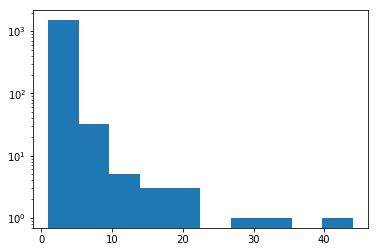

In [98]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.hist(list(lord_df["count"]))

In [106]:
alist = [[k, v] for k, v in adict.items()]
alist

[[44, 1],
 [34, 1],
 [27, 1],
 [22, 1],
 [21, 1],
 [20, 1],
 [15, 2],
 [14, 1],
 [11, 1],
 [10, 4],
 [9, 8],
 [8, 3],
 [7, 9],
 [6, 12],
 [5, 17],
 [4, 30],
 [3, 54],
 [2, 159],
 [1, 1243]]